# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#save api_key info
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_info = []

record_num = 1
of_set_num = 1


print("Beginning Data Retrieval")
print("-----------------------------")

#weather check on each city through looping and try and catch. 
#.enumerate()
for i, city in enumerate(cities):
    
#build request query url 
#request results in imperial (Fahrenheit)
    query_url = f"{url}appid={weather_api_key}&units={units}"
   
        
    try:

        print(f"Processing Record {record_num} of Set {of_set_num} | {city}")
        weather_response = requests.get(f"{query_url}&q={city}")
        weather_json = weather_response.json()

        
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        
        city_info.append({"City":city,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,
                          "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
        
        record_num +=1 
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    #pause for 30 secs
    if record_num == 55:
        of_set_num += 1
        record_num = 1
       
        time.sleep(30)
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | were ilu
Processing Record 5 of Set 1 | codigoro
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | sabzevar
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | salisbury
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kaplice
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | badaojiang
City not found. Skipping...
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ennis
Processing Reco

City not found. Skipping...
Processing Record 7 of Set 4 | togur
Processing Record 8 of Set 4 | necochea
Processing Record 9 of Set 4 | lebu
Processing Record 10 of Set 4 | ancud
Processing Record 11 of Set 4 | reconquista
Processing Record 12 of Set 4 | bozeman
Processing Record 13 of Set 4 | maarianhamina
Processing Record 14 of Set 4 | victor harbor
Processing Record 15 of Set 4 | newcastle
Processing Record 16 of Set 4 | lasa
Processing Record 17 of Set 4 | marietta
Processing Record 18 of Set 4 | wum
Processing Record 19 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 19 of Set 4 | jackson
Processing Record 20 of Set 4 | carnarvon
Processing Record 21 of Set 4 | bintulu
Processing Record 22 of Set 4 | osmaniye
Processing Record 23 of Set 4 | brae
Processing Record 24 of Set 4 | murgab
Processing Record 25 of Set 4 | pevek
Processing Record 26 of Set 4 | svetlogorsk
Processing Record 27 of Set 4 | opuwo
Processing Record 28 of Set 4 | namatanai
Processing Recor

Processing Record 8 of Set 7 | awjilah
Processing Record 9 of Set 7 | ruatoria
City not found. Skipping...
Processing Record 9 of Set 7 | khargone
Processing Record 10 of Set 7 | arinos
Processing Record 11 of Set 7 | north branch
Processing Record 12 of Set 7 | honiara
Processing Record 13 of Set 7 | santa isabel do rio negro
Processing Record 14 of Set 7 | prachuap khiri khan
Processing Record 15 of Set 7 | nyurba
Processing Record 16 of Set 7 | bjornevatn
Processing Record 17 of Set 7 | yomitan
City not found. Skipping...
Processing Record 17 of Set 7 | maku
Processing Record 18 of Set 7 | ahuimanu
Processing Record 19 of Set 7 | jati
Processing Record 20 of Set 7 | manta
Processing Record 21 of Set 7 | porto novo
Processing Record 22 of Set 7 | bonthe
Processing Record 23 of Set 7 | konevo
Processing Record 24 of Set 7 | vaitupu
City not found. Skipping...
Processing Record 24 of Set 7 | porto walter
Processing Record 25 of Set 7 | sioux lookout
Processing Record 26 of Set 7 | nant

Processing Record 24 of Set 10 | lakota
Processing Record 25 of Set 10 | margate
Processing Record 26 of Set 10 | makakilo city
Processing Record 27 of Set 10 | mathbaria
Processing Record 28 of Set 10 | juneau
Processing Record 29 of Set 10 | bilibino
Processing Record 30 of Set 10 | malakal
Processing Record 31 of Set 10 | nueve de julio
Processing Record 32 of Set 10 | baft
Processing Record 33 of Set 10 | aksarayskiy
Processing Record 34 of Set 10 | katobu
Processing Record 35 of Set 10 | riachao
Processing Record 36 of Set 10 | kloulklubed
Processing Record 37 of Set 10 | zhanakorgan
Processing Record 38 of Set 10 | hirado
Processing Record 39 of Set 10 | kabwe
Processing Record 40 of Set 10 | mackay
Processing Record 41 of Set 10 | changqing
Processing Record 42 of Set 10 | bairiki
Processing Record 43 of Set 10 | oussouye
Processing Record 44 of Set 10 | houma
Processing Record 45 of Set 10 | rudbar
Processing Record 46 of Set 10 | gambiran
Processing Record 47 of Set 10 | karau

In [5]:
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_info_DF = pd.DataFrame(city_info)

city_info_DF.to_csv("../output_data/cities.csv", encoding="utf-8",index=False)
city_info_DF


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.45,-133.04,10.40,92,90,16.11,CA,1603855047
1,ushuaia,-54.80,-68.30,44.60,42,40,13.87,AR,1603854789
2,thompson,55.74,-97.86,17.60,78,75,5.82,CA,1603855048
3,were ilu,10.60,39.43,43.79,67,0,5.57,ET,1603854969
4,codigoro,44.83,12.11,50.00,87,0,3.36,IT,1603855048
...,...,...,...,...,...,...,...,...,...
557,tarko-sale,64.92,77.78,0.36,90,0,13.85,RU,1603855440
558,miyang,24.40,103.44,67.26,75,100,1.52,CN,1603855441
559,pestyaki,56.71,42.67,34.81,88,30,8.93,RU,1603855441
560,mosquera,4.71,-74.23,57.20,87,40,2.24,CO,1603855441


In [7]:
city_info_DF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.776281,12.986068,57.231566,74.580071,52.950178,7.391281,1.603855e+09
std,33.402710,89.848627,21.871499,18.834342,39.717106,5.391333,1.400025e+02
min,-54.800000,-179.170000,-6.210000,7.000000,0.000000,0.220000,1.603855e+09
25%,-6.512500,-65.080000,41.000000,65.000000,4.000000,3.360000,1.603855e+09
50%,25.440000,17.685000,61.935000,79.000000,63.500000,5.820000,1.603855e+09
75%,49.080000,88.342500,75.630000,88.000000,90.000000,10.432500,1.603855e+09
max,78.220000,179.320000,94.060000,100.000000,100.000000,41.380000,1.603855e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

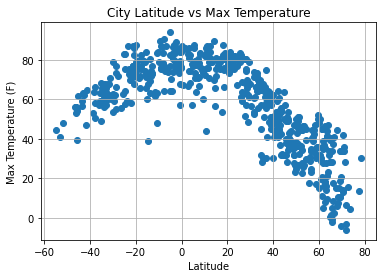

In [11]:
plt.scatter(city_info_DF["Lat"],city_info_DF["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)

plt.savefig("../output_data/Lat_vs_Temp_plot.png")

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing
#This scatter plot is looking at the relationship between the city latitue and the max temperature. From this graph you can see that the equator is where the temperature peaks. At any degree to the left or right of that Latitude, the temperature decreases. Hence why the latitude is the "standard"/point of measurement in relation to all other points.


## Latitude vs. Humidity Plot

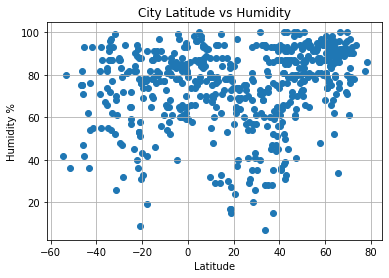

In [12]:
plt.scatter(city_info_DF["Lat"],city_info_DF["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity")
plt.grid(True)

plt.savefig("../output_data/Lat_vs_Humidity_plot.png")

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing
#Again, using the 0 Latitude as reference, the above graph show that there isn't really a trend as far as humditify in relation to the equator. {ossibly that humidity tends to be higher for most cities but not all.}

## Latitude vs. Cloudiness Plot

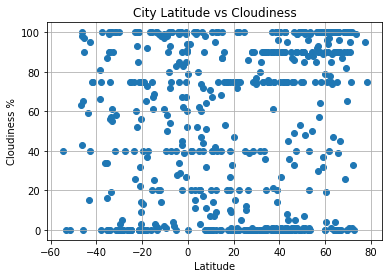

In [13]:
plt.scatter(city_info_DF["Lat"],city_info_DF["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)

plt.savefig("../output_data/Lat_vs_Cloudiness_plot.png")

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing
#Using the latitude as your x value, we can determine from the graph that no matter whetere we go higher or lower, there doesn't appear to be a relationship between the cloudiness and the latitude. From the graph we cannot determine a posisite or negative trend that would suggest relation between the x and y axis.

## Latitude vs. Wind Speed Plot

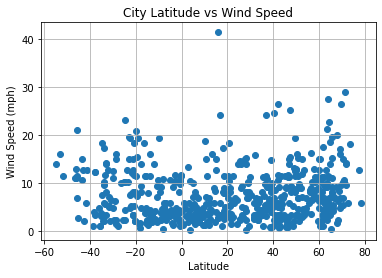

In [14]:
plt.scatter(city_info_DF["Lat"],city_info_DF["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)

plt.savefig("../output_data/Lat_vs_Wind_Speed plot.png")

In [ ]:
#After each plot add a sentence or too explaining what the code is and analyzing
#From the above graph, aside from an outlier, we don't really see a positive or negative trend amongst the cities with latitudes higher or lower than 0. Wind speeds for the cities tend to be random/rather low.

## Linear Regression

In [15]:
northern = city_info_DF.loc[(city_info_DF["Lat"]>=0)]
northern
southern = city_info_DF.loc[(city_info_DF["Lat"]<0)]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ushuaia,-54.80,-68.30,44.60,42,40,13.87,AR,1603854789
8,rikitea,-23.12,-134.97,75.45,84,100,14.90,PF,1603855048
10,puerto ayora,-0.74,-90.35,68.00,95,99,1.01,EC,1603855049
13,arraial do cabo,-22.97,-42.03,72.77,90,26,19.66,BR,1603855049
20,vaini,-21.20,-175.20,77.00,78,75,12.75,TO,1603855050
...,...,...,...,...,...,...,...,...,...
533,machachi,-0.50,-78.57,57.20,81,90,2.24,EC,1603855405
536,panji,-7.73,114.10,90.45,52,54,3.80,ID,1603855406
540,itarema,-2.92,-39.92,77.27,83,100,10.45,BR,1603855436
546,envira,-7.30,-70.22,74.23,86,100,3.27,BR,1603855437


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is : 0.7623965009671526


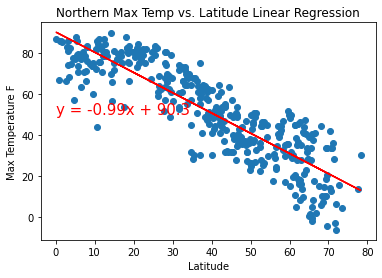

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.title("Northern Max Temp vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Northern_Max_Temp_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#From the negative linear regression as well as negative r value we can determine that as the latitude increase the max temperature decreases. As you move further north, the temperature cools.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is : 0.4677361097390088


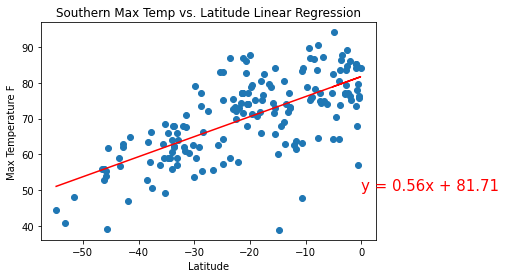

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.title("Southern Max Temp vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Southern_Max_Temp_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#From the positive linear regression as well as positive r value we can determine that as the latitude decreases the max temperature decreases. As you move further south from the equator, the temperature cools.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is : 0.075649820293075


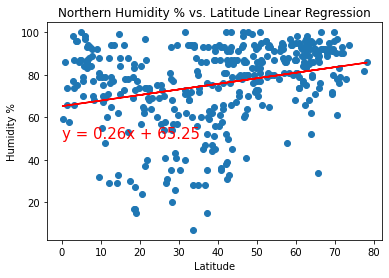

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern["Lat"]
y_values = northern["Humidity"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Humidity % vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Northern_Humidity_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#From the above graph's slightly positive linear regression, we can see that as the latitude increases, there is evidence there is a potential relationship with increasing humidty howeever, with the amount of outliers, I think that isn't a 100% accurate statement.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is : 0.01860425493462143


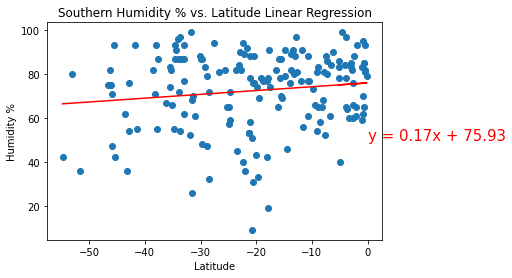

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern["Lat"]
y_values = southern["Humidity"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Humidity % vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Southern_Humidity_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

#From the above graph's slightly positive linear regression, we can see that as the latitude increases, there is evidence there is a potential relationship with increasing humidty howeever, with the amount of outliers, I think that isn't a 100% accurate statement.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is : 0.0650492382370072


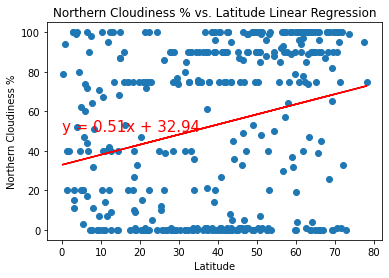

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern["Lat"]
y_values = northern["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Northern Cloudiness %")
plt.title("Northern Cloudiness % vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Northern_Cloudiness_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#Although a positive linear regression and r value, the amount of outliers prevent me from drowing a solid relationship between the two factors. It does not appear to be a relationship between the Latitude and the cloudiness in the northern hemisphere and if there is it is extremely slight.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is : 0.01542832265181544


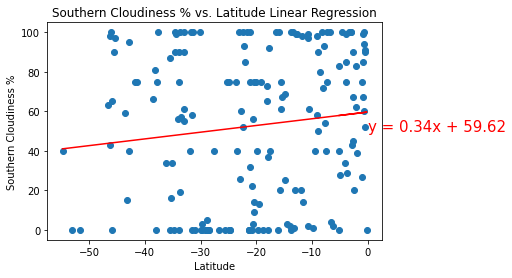

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern["Lat"]
y_values = southern["Cloudiness"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Southern Cloudiness %")
plt.title("Southern Cloudiness % vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Southern_Cloudiness_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#Although a positive linear regression and r value, the amount of outliers prevent me from drowing a solid relationship between the two factors. It does not appear to be a relationship between the Latitude and the cloudiness in the southern hemisphere and if there is it is extremely slight.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is : 0.05213321139463735


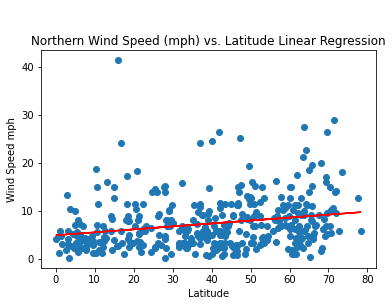

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northern["Lat"]
y_values = northern["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("Northern Wind Speed (mph) vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Northern_Wind_Speed_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#There is a positive linear regression however the r value is less than .7 so it is not statistically strong. Similar to the couple of graphs above, tehre doens't appear to be a solid relationship between the latitude and the wind speed. From the cities dataframe, the wind speed for a mority tend to be low, but that is not uniform across the board in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is : 0.06763385650737613


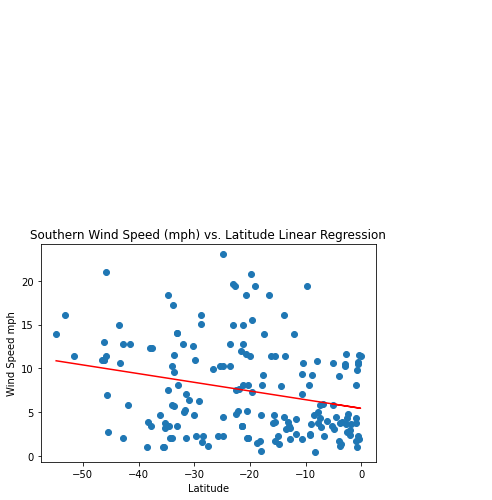

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern["Lat"]
y_values = southern["Wind Speed"]

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("Southern Wind Speed (mph) vs. Latitude Linear Regression")
print(f"the r-squared is : {rvalue**2}")
plt.show()
plt.savefig("../output_data/Southern_Wind_Speed_vs_Latitude_Linear_Regression.png")


In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
#There is a positive linear regression however the r value is less than .7 so it is not statistically strong. Similar to the couple of graphs above, tehre doens't appear to be a solid relationship between the latitude and the wind speed. From the cities dataframe, the wind speed for a mority tend to be low, but that is not uniform across the board in the southern hemisphere. Possibly if plotting for both hemispheres was done on the same graph, you may be able to really see a relationship.